In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import spherical_stats

PROJECT_ROOT = os.path.abspath(os.pardir)
sys.path.append(PROJECT_ROOT)

%matplotlib widget

In [2]:
lut = np.load('data/msAngleLUTTest.npy')
d = np.load('data/msAngleLUTTestAxes.npz')
energyArray = d['arr_0']
stepsizeArray = d['arr_1']
densityArray = d['arr_2']

Dispersion parameter (vMF)

Text(0.5, 1.0, '$E=1.011e+01$ and $\\Delta s=5.338e-02$')

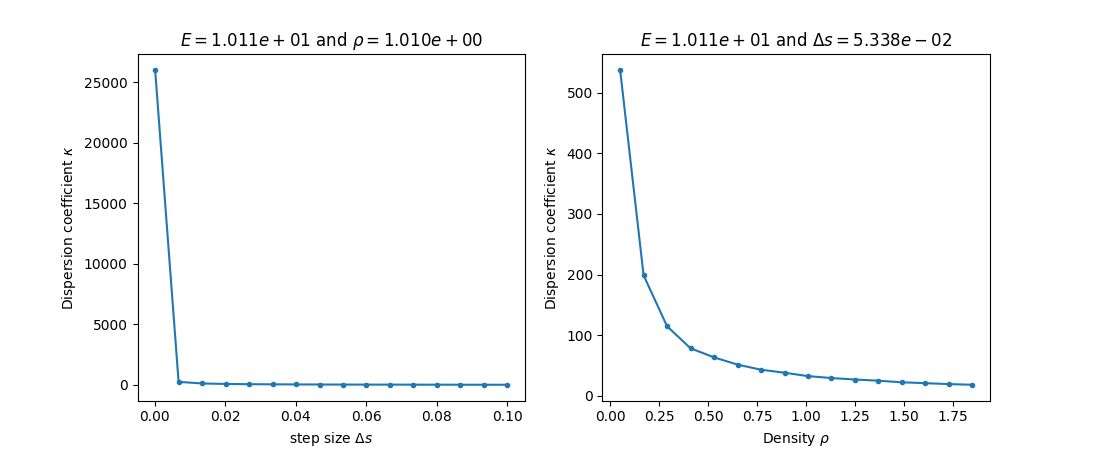

In [3]:
energyIndex = energyArray.size//2
stepsizeIndex = stepsizeArray.size//2
densityIndex = densityArray.size//2

# Data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))

ax1.plot(stepsizeArray, lut[energyIndex, :, densityIndex, 0], '.-')
ax1.set_xlabel('step size $\Delta s$')
ax1.set_ylabel('Dispersion coefficient $\kappa$')
ax1.set_title(f'$E={energyArray[energyIndex]:.3e}$ and $\\rho={densityArray[densityIndex]:.3e}$')

ax2.plot(densityArray, lut[energyIndex, stepsizeIndex, :, 0], '.-')
ax2.set_xlabel('Density $\\rho$')
ax2.set_ylabel('Dispersion coefficient $\kappa$')
ax2.set_title(f'$E={energyArray[energyIndex]:.3e}$ and $\Delta s={stepsizeArray[stepsizeIndex]:.3e}$')

# Large dispersion coefficient, small spread.

In [4]:
energyIndex = energyArray.size//2
stepsizeIndex = stepsizeArray.size//2
densityIndex = densityArray.size//2

mu = np.array((0.0, 0.0, 1.0), dtype=float)
kappa = lut[energyIndex, stepsizeIndex, densityIndex, 0]

vmf = spherical_stats._vmf.VMF(mu, kappa)

samples = vmf.rvs(size = 750)

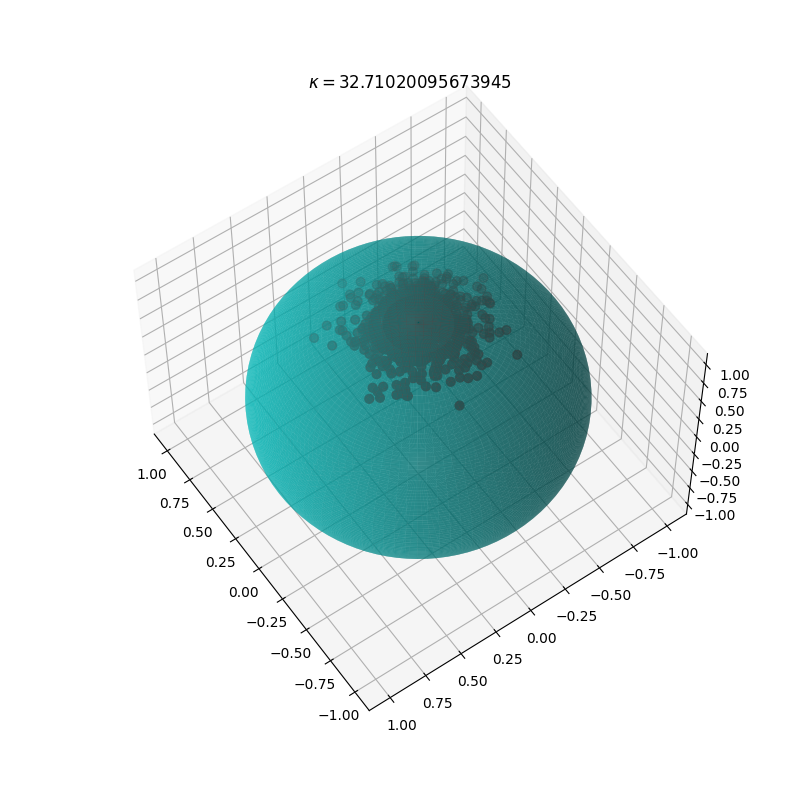

In [5]:

N_GRID = 100

x, y, z = spherical_stats.sphere(n_grid = N_GRID)

plt.rcParams['figure.figsize'] = [8, 8]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='c', alpha=0.6, linewidth=1)
ax.set_title(f'$\kappa = {kappa}$')

ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], color="r", s=40)
ax.view_init(57, 145)
plt.show()


In [6]:
# Variance of distributions

# vMF: 1/kappa
# Expon: 1/lambda**2
# esag: covariance matrix

In [7]:
energyIndex = energyArray.size//2
stepsizeIndex = stepsizeArray.size//2
densityIndex = densityArray.size//2

kappa = lut[energyIndex, stepsizeIndex, densityIndex, 0]
mu = lut[energyIndex, stepsizeIndex, densityIndex, 1:4]
gamma_1 = lut[energyIndex, stepsizeIndex, densityIndex, 4]
gamma_2 = lut[energyIndex, stepsizeIndex, densityIndex, 5]
scale = lut[energyIndex, stepsizeIndex, densityIndex, 7]

# Variance vMF
varvMF = 1/kappa

# Variance Exponential distribution
varExpon = scale**2

# Variance ESAG
inv_cov = spherical_stats._esag._calc_inv_cov_matrix(mu, gamma_1, gamma_2)
covesag = spherical_stats._utils._invertmatrix(inv_cov)

print(varvMF)
print(varExpon)
print(covesag)

0.03057150279579572
0.0009349590623503285
[[ 1.00691129e+00 -6.76553373e-03 -1.31855016e-05]
 [-6.76553373e-03  9.93181613e-01 -7.18699799e-06]
 [-1.31855016e-05 -7.18699799e-06  9.99999995e-01]]
